In [1]:
#Install yfinance - historical market data from yahoo finance

In [2]:
pip install yfinance

In [67]:
import yfinance as yf
import pandas as pd

In [68]:
sp500=yf.Ticker("^GSPC")

In [69]:
sp500

yfinance.Ticker object <^GSPC>

In [70]:
sp500=sp500.history(period="max")

In [71]:
sp500.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0


In [72]:
sp500=pd.DataFrame(sp500)

In [9]:
#Dropping irrelevant columns

In [73]:
sp500.drop('Dividends',axis=1,inplace=True)

In [74]:
sp500.drop('Stock Splits',axis=1,inplace=True)

In [75]:
sp500.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [76]:
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2023-07-03 00:00:00-04:00', '2023-07-05 00:00:00-04:00',
               '2023-07-06 00:00:00-04:00', '2023-07-07 00:00:00-04:00',
               '2023-07-10 00:00:00-04:00', '2023-07-11 00:00:00-04:00',
               '2023-07-12 00:00:00-04:00', '2023-07-13 00:00:00-04:00',
               '2023-07-14 00:00:00-04:00', '2023-07-17 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=23999, freq=None)

In [77]:
import matplotlib.pyplot as plt

In [78]:
close=sp500['Close']

In [79]:
index=sp500.index

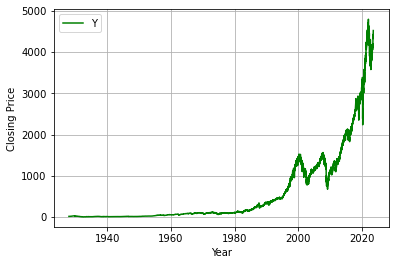

In [80]:
plt.plot(index,close,'g')
plt.xlabel("Year")
plt.ylabel("Closing Price")
#plt.axis(['1940','2023','1000','5000'])
plt.grid(True)
plt.legend('Year')
plt.show()

In [18]:
#we do not need absolute price,we just need directionality - stock going up or stock going down

In [81]:
sp500['Tommorow']=sp500['Close'].shift(-1)

In [82]:
sp500['Target']=(sp500['Tommorow']>sp500['Close']).astype(int)

In [83]:
sp500.head()

,Open,High,Low,Close,Volume,Tommorow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0


In [ ]:
#To find the trend of stock_market,the data before 1990s may not be that helpful....so we try to drop the datapoints

In [84]:
sp500=sp500.loc["1990-01-01":]

In [86]:
sp500

,Open,High,Low,Close,Volume,Tommorow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2023-07-11 00:00:00-04:00,4415.549805,4443.640137,4408.459961,4439.259766,3624220000,4472.160156,1
2023-07-12 00:00:00-04:00,4467.689941,4488.339844,4463.229980,4472.160156,3920290000,4510.040039,1
2023-07-13 00:00:00-04:00,4491.500000,4517.379883,4489.359863,4510.040039,3839530000,4505.419922,0


In [24]:
#Initial ML Model

In [87]:
from sklearn.ensemble import RandomForestClassifier

In [88]:
model1=RandomForestClassifier(n_estimators=100,min_samples_split=100,random_state=42)

In [27]:
#For time series we cannot use train_test_split as there is a chance of data leakage and violate the time-dependent nature of the data

In [89]:
train=sp500.iloc[:-250]
test=sp500.iloc[-250:]

In [90]:
print(train.shape)
print(test.shape)

(8199, 7)
(250, 7)


In [91]:
predictors=['Open','Close','High','Low']

In [92]:
model1.fit(train[predictors],train['Target'])

RandomForestClassifier(min_samples_split=100, random_state=42)

In [93]:
from sklearn.metrics import precision_score

In [94]:
test_pred=model1.predict(test[predictors])

In [95]:
test_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1])

In [96]:
test_pred=pd.Series(test_pred,index=test.index,name='Predictions')

In [97]:
test_pred

Date
2022-07-19 00:00:00-04:00    0
2022-07-20 00:00:00-04:00    0
2022-07-21 00:00:00-04:00    0
2022-07-22 00:00:00-04:00    0
2022-07-25 00:00:00-04:00    0
                            ..
2023-07-11 00:00:00-04:00    1
2023-07-12 00:00:00-04:00    1
2023-07-13 00:00:00-04:00    1
2023-07-14 00:00:00-04:00    0
2023-07-17 00:00:00-04:00    1
Name: Predictions, Length: 250, dtype: int32

In [98]:
precision_score(test['Target'],test_pred)

0.4551282051282051

In [99]:
combined=pd.concat((test['Target'],test_pred),axis=1)

In [100]:
combined.head()

,Target,Predictions
Date,,
2022-07-19 00:00:00-04:00,1,0
2022-07-20 00:00:00-04:00,1,0
2022-07-21 00:00:00-04:00,0,0
2022-07-22 00:00:00-04:00,1,0
2022-07-25 00:00:00-04:00,0,0


<AxesSubplot:xlabel='Date'>

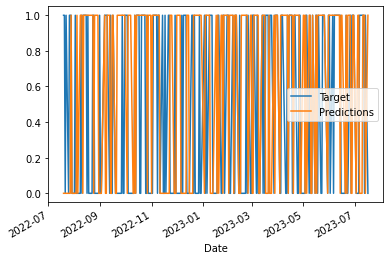

In [101]:
combined.plot()

In [ ]:
#BackTesting to improve accuracy,In Backtesting we try to increase the accuracy by predicting the targets for every year by fitting initial 10 years data.

In [102]:
def predict(train,test,predictors,model1):
    model1.fit(train[predictors],train['Target'])
    test_pred=model1.predict(test[predictors])
    test_pred=pd.Series(test_pred,index=test.index,name='test_pred')
    combined=pd.concat([test['Target'],test_pred],axis=1)
    return combined

In [103]:
def backtest(data,model,predictors,start=2500,step=250):
    all_predictions=[]
    for i in range(start,data.shape[0],step):
        train=data.iloc[0:i]
        test=data.iloc[i:(i+step)]
        predictions=predict(train,test,predictors,model1)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [104]:
predictions=backtest(sp500,model1,predictors)

In [105]:
predictors

['Open', 'Close', 'High', 'Low']

In [106]:
predictions['test_pred'].value_counts()

0    3391
1    2558
Name: test_pred, dtype: int64

In [107]:
predictions['Target'].value_counts()/predictions.shape[0]

1    0.534039
0    0.465961
Name: Target, dtype: float64

In [108]:
precision_score(predictions['Target'],predictions['test_pred'])

0.5367474589523065

In [49]:
##Adding Additional Predictors - By 3 days,1 week,3 months,1 year,4 years - calculating rolling averages....

In [51]:
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]
    
    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]
    
    new_predictors+= [ratio_column, trend_column]

In [52]:
new_predictors

['Close_Ratio_2',
 'Trend_2',
 'Close_Ratio_5',
 'Trend_5',
 'Close_Ratio_60',
 'Trend_60',
 'Close_Ratio_250',
 'Trend_250',
 'Close_Ratio_1000',
 'Trend_1000']

In [53]:
sp500 = sp500.dropna(subset=sp500.columns[sp500.columns != "Tomorrow"])

In [54]:
sp500

,Open,High,Low,Close,Volume,Tommorow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-10 00:00:00-04:00,4394.229980,4412.600098,4389.919922,4409.529785,3429600000,4439.259766,1,1.001201,1.0,0.996617,2.0,1.040931,32.0,1.096722,118.0,1.160905,532.0
2023-07-11 00:00:00-04:00,4415.549805,4443.640137,4408.459961,4439.259766,3624220000,4472.160156,1,1.003360,2.0,1.004078,2.0,1.046742,32.0,1.103435,119.0,1.168282,533.0
2023-07-12 00:00:00-04:00,4467.689941,4488.339844,4463.229980,4472.160156,3920290000,4510.040039,1,1.003692,2.0,1.010361,3.0,1.053115,33.0,1.110872,120.0,1.176480,533.0


In [55]:
model1= RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [56]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    test_pred= model.predict_proba(test[predictors])[:,1]
    test_pred[test_pred>=.6] = 1   #verifying confidence intervals if confidence greater than 60% then markig it 1
    test_pred[test_pred<.6] = 0
    test_pred= pd.Series(test_pred, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"],test_pred], axis=1)
    return combined

In [58]:
predictions = backtest(sp500, model1, new_predictors)

In [60]:
predictions["Predictions"].value_counts()

0.0    4131
1.0     817
Name: Predictions, dtype: int64

In [61]:
predictions

,Target,Predictions
Date,,
2003-11-14 00:00:00-05:00,0,0.0
2003-11-17 00:00:00-05:00,0,1.0
2003-11-18 00:00:00-05:00,1,1.0
2003-11-19 00:00:00-05:00,0,0.0
2003-11-20 00:00:00-05:00,1,1.0
...,...,...
2023-07-10 00:00:00-04:00,1,0.0
2023-07-11 00:00:00-04:00,1,0.0
2023-07-12 00:00:00-04:00,1,0.0


In [62]:
precision_score(predictions['Target'],predictions['Predictions'])

0.5691554467564259